In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

## Load some raw resting state data from HCP

In [2]:
import torch
from os.path import expanduser
from torch.utils.data import DataLoader

from data import get_dataset


train_dataset, test_dataset, mask = get_dataset(in_memory=True)

train_loader = DataLoader(train_dataset, batch_size=32,
                          shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32,
                         shuffle=False)

In [3]:
test_data = torch.cat([this_data for this_data in test_loader]).numpy()

In [4]:
test_data.shape

(300, 1, 91, 109, 91)

## Find the dynamic range and clip the outliers (when plotting)

In [5]:
all_test_voxels = test_data.ravel()
all_test_voxels.shape

(270788700,)

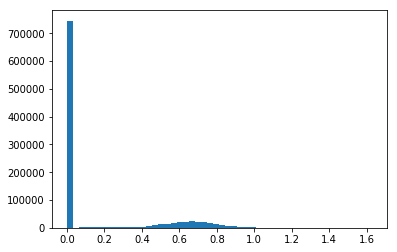

In [6]:
rng = np.random.RandomState(42)
subsample_idx = rng.randint(0, all_test_voxels.size - 1, size=int(1e6))
test_voxels_subsample = all_test_voxels[subsample_idx] 
plt.hist(test_voxels_subsample, bins=50);

In [7]:
vmin, vmax = np.percentile(test_voxels_subsample, [0, 99.9])
vmin, vmax

(0.0, 1.0435531356334722)

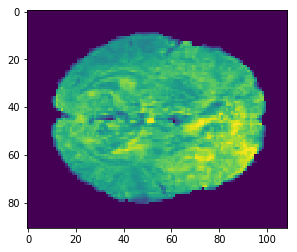

In [8]:
frame_idx = 0
channel_idx = 0
cut_idx = 40

plt.imshow(test_data[frame_idx, channel_idx, :, :, cut_idx], vmax=vmax);

## Generate a movie of the test bold signal

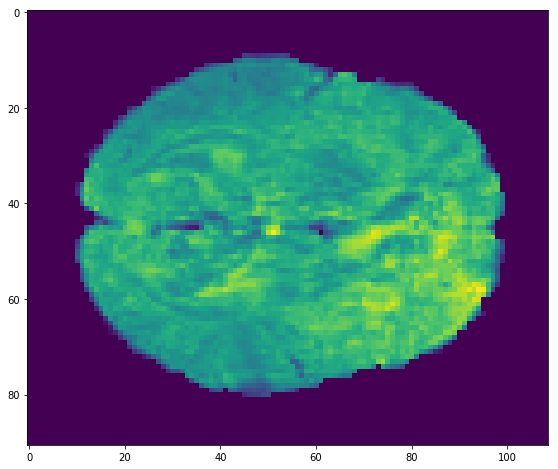

In [9]:
def make_animation(frames, interval=200, fig=None):
    if fig is None:
        fig = plt.figure(figsize=(12, 8))

    im = plt.imshow(frames[0], animated=True)

    def updatefig(frame):
        im.set_array(frame)
        return im,

    return animation.FuncAnimation(fig, updatefig, frames=frames,
                                   interval=interval, blit=True)


anim = make_animation(test_data[:, channel_idx, :, :, cut_idx])

In [10]:
HTML(anim.to_html5_video())